# Demanda de Vitamina C

Consideremos uma empresa de varejo, do ramo farmacêutico, que deseja simular sua demanda diária de determinado item do estoque: vitamina C.
Para tanto, é preciso, inicialmente, que se identifiquem as probabilidades das demandas diárias, o que pode ser feito através do exame dos dados históricos das vendas do produto.

EXPERIMENTAÇÃO: Primeiro, consideremos que o relatório de vendas nos últimos 100 dias tenha apontado o seguinte comportamento para a demanda diária de frascos de vitamina C. conforme as listas abaixo:

In [1]:
import pandas as pd
import numpy as np

lista_numero_frascos = []
lista_numero_ocorrencias = []

numero_linhas = int(input('Entre com o Número de Linhas: '))
for i in range(numero_linhas):
    numero_frascos = int(input('Entre com os Frascos Demandados:'))
    numero_ocorrencias = int(input('Entre com as Ocorrências:'))
    lista_numero_frascos.append(numero_frascos)
    lista_numero_ocorrencias.append(numero_ocorrencias)

demanda_diaria = {
    'numero_frascos': lista_numero_frascos,
    'numero_dias':lista_numero_ocorrencias
}

dist_freq = pd.DataFrame( demanda_diaria, index = ['linha 0', 'linha 1', 'linha 2'])
dist_freq

Entre com o Número de Linhas: 3
Entre com os Frascos Demandados:10
Entre com as Ocorrências:30
Entre com os Frascos Demandados:11
Entre com as Ocorrências:30
Entre com os Frascos Demandados:12
Entre com as Ocorrências:40


numero_frascos  numero_dias
linha 0              10           30
linha 1              11           30
linha 2              12           40

Com base nesses dados, podemos construir a distribuição de frequências relativas apresentada na tabela abaixo, dividindo a frequência de de cada observação (número_dias) pelo número total de observações(100)

In [2]:
# Calcula o número total de observações
soma = np.sum(dist_freq['numero_dias'])
print(soma)
# Adicione uma nova coluna chamada 'Probabilidade'
dist_freq['Probabilidade'] = dist_freq['numero_dias']/soma
  
# Imprima o DataFrame até agora:
print(dist_freq)


100
         numero_frascos  numero_dias  Probabilidade
linha 0              10           30            0.3
linha 1              11           30            0.3
linha 2              12           40            0.4


Como é possível SIMULAR a ocorrência da demanda de vitamina, obedecendo às probabilidades apresentadas neste DataFrame 2?

Através da geração de números aleatórios, pode ser feito com a função random.randint(100) do NumPy, e antes disso precisamos elaborar um DataFrame 3 com as probabilidades acumuladas:

In [3]:
Probabilidade_acumulada = []
acum = 0
for x in dist_freq['Probabilidade']:
    resultado = x + acum
    Probabilidade_acumulada.append(resultado)
    acum = resultado

# Adicione uma nova coluna chamada 'Probabilidade'

dist_freq['Probabilidade_acumulada'] = Probabilidade_acumulada
dist_freq

numero_frascos  numero_dias  Probabilidade  Probabilidade_acumulada
linha 0              10           30            0.3                      0.3
linha 1              11           30            0.3                      0.6
linha 2              12           40            0.4                      1.0

In [4]:
lim_superior_demanda = []

for x in dist_freq['Probabilidade_acumulada']:
    lim_sup = x * 100
    lim_superior_demanda.append(lim_sup)

lim_sup
lim_superior_demanda

dist_freq['lim_superior_demanda'] = lim_superior_demanda
dist_freq

numero_frascos  numero_dias  Probabilidade  Probabilidade_acumulada  \
linha 0              10           30            0.3                      0.3   
linha 1              11           30            0.3                      0.6   
linha 2              12           40            0.4                      1.0   

         lim_superior_demanda  
linha 0                  30.0  
linha 1                  60.0  
linha 2                 100.0

In [5]:
lim_inferior_demanda = [1]

for x in dist_freq['lim_superior_demanda']:
    lim_inf = x + 1
    lim_inferior_demanda.append(lim_inf)
    
lim_inferior_demanda
lim_inferior_demanda.pop(-1)
print(lim_inferior_demanda)

dist_freq['lim_inferior_demanda'] = lim_inferior_demanda
#dados_demanda['lim_superior_demanda'] = lim_superior_demanda
#dist_freq = pd.DataFrame( dados_chegada, index = ['linha 0', 'linha 1', 'linha 2', 'linha 3', 'linha 4'])
dist_freq

[1, 31.0, 61.0]


numero_frascos  numero_dias  Probabilidade  Probabilidade_acumulada  \
linha 0              10           30            0.3                      0.3   
linha 1              11           30            0.3                      0.6   
linha 2              12           40            0.4                      1.0   

         lim_superior_demanda  lim_inferior_demanda  
linha 0                  30.0                   1.0  
linha 1                  60.0                  31.0  
linha 2                 100.0                  61.0

In [6]:
matriz = dist_freq.loc[:,['numero_frascos','lim_inferior_demanda','lim_superior_demanda']]
print(matriz)

         numero_frascos  lim_inferior_demanda  lim_superior_demanda
linha 0              10                   1.0                  30.0
linha 1              11                  31.0                  60.0
linha 2              12                  61.0                 100.0


In [7]:
contagem = matriz['numero_frascos'].count() #contagem das linhas na matriz

Agora vamos inserir quantas tentativas gerando um número aleatório e, buscando o intervalo que ele se encontra, teremos a demanda (numero_frascos)

In [8]:
from numpy import random

def criaLista(lim_inferior_demanda, lim_superior_demanda):
    return np.arange(lim_inferior_demanda, lim_superior_demanda+1,1)

tentativas = int(input("Digite quantas tentativas quer fazer: "))

lista_demanda = []
lista_randomica = []

j = 1
while j <= tentativas:
    alea = random.randint(100)
    for i in range(0,contagem):
        x=int(matriz.iloc[i]['lim_inferior_demanda'])
        y=int(matriz.iloc[i]['lim_superior_demanda'])

        z=int(matriz.iloc[i]['numero_frascos'])
        lista = criaLista(x,y)
            
        if alea in lista:
            demanda = z
            lista_demanda.append(demanda) 
            lista_randomica.append(alea)
            j += 1
        else:
            pass


matriz_demanda = pd.DataFrame(lista_demanda, columns=['Demanda'])
matriz_demanda['Num. Aleatório'] = lista_randomica
print(matriz_demanda)

media_demanda = np.sum(lista_demanda)/ len(lista_demanda)
print('\nA média da demanda é: {:.2f}'.format(media_demanda))

Digite quantas tentativas quer fazer: 15
    Demanda  Num. Aleatório
0        10              30
1        12              97
2        11              44
3        10              14
4        11              46
5        10              24
6        12              73
7        11              34
8        10              19
9        12              61
10       12              73
11       10               3
12       10              23
13       10              27
14       12              94

A média da demanda é: 10.87


### Usando o método do choice() do randon NumPy: np.random.choice()

Entrada dos INPUTS 

In [9]:
import pandas as pd
import numpy as np

lista_numero_frascos = []
lista_numero_ocorrencias = []

numero_linhas = int(input('Entre com o Número de Linhas: '))
for i in range(numero_linhas):
    numero_frascos = int(input('Entre com os Frascos Demandados:'))
    numero_ocorrencias = int(input('Entre com as Ocorrências:'))
    lista_numero_frascos.append(numero_frascos)
    lista_numero_ocorrencias.append(numero_ocorrencias)

demanda_diaria = {
    'numero_frascos': lista_numero_frascos,
    'numero_dias':lista_numero_ocorrencias
}
print(demanda_diaria)
dist_freq = pd.DataFrame( demanda_diaria, index = ['linha 0', 'linha 1', 'linha 2'])
dist_freq

Entre com o Número de Linhas: 3
Entre com os Frascos Demandados:10
Entre com as Ocorrências:30
Entre com os Frascos Demandados:11
Entre com as Ocorrências:30
Entre com os Frascos Demandados:12
Entre com as Ocorrências:40
{'numero_frascos': [10, 11, 12], 'numero_dias': [30, 30, 40]}


numero_frascos  numero_dias
linha 0              10           30
linha 1              11           30
linha 2              12           40

Cálculo da Probabilidade

In [10]:
# Calcula o número total de observações
Total=dist_freq['numero_dias'].sum()
print("Coluna Numero de Dias:",Total)
# Adicione uma nova coluna chamada 'Probabilidade'
dist_freq['Probabilidade'] = dist_freq['numero_dias']/Total                                                      
# Imprima o DataFrame até agora:
dist_freq

Coluna Numero de Dias: 100


numero_frascos  numero_dias  Probabilidade
linha 0              10           30            0.3
linha 1              11           30            0.3
linha 2              12           40            0.4

In [14]:
tentativas = int(input('Quantas tentativas quer fazer:'))
Probabilidade = dist_freq['Probabilidade']
demanda = np.random.choice(dist_freq['numero_frascos'], tentativas, p = dist_freq['Probabilidade'])
print(demanda)

Quantas tentativas quer fazer:15
[12 10 10 11 11 10 11 12 11 12 10 12 11 11 12]


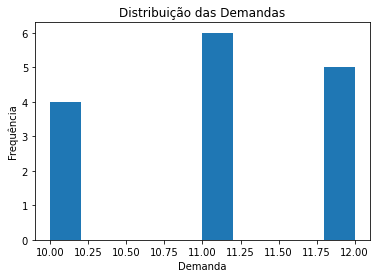

In [15]:
import matplotlib.pyplot as plt

x = demanda

plt.hist(x)
plt.xlabel('Demanda')
plt.ylabel('Frequência')
plt.title('Distribuição das Demandas')
plt.show()

In [16]:
df = pd.DataFrame(index=range(tentativas), data={'Demanda': demanda})
print(df)
media_demanda = np.sum(demanda)/tentativas
print('\nA média da demanda é: {:.2f}'.format(media_demanda))

    Demanda
0        12
1        10
2        10
3        11
4        11
5        10
6        11
7        12
8        11
9        12
10       10
11       12
12       11
13       11
14       12

A média da demanda é: 11.07
